In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [23]:


#
# ==================================================================
#

def weight_variable(shape):
  initial = tf.truncated_normal( shape, stddev=0.1 )
  return tf.Variable( initial )

def bias_variable(shape):
  initial = tf.constant( 0.1, shape=shape )
  return tf.Variable(initial)

#
# ==================================================================
#

# Declare computation graph

y_ = tf.placeholder( tf.float32, shape=[None, 10], name="y_" )
x = tf.placeholder( tf.float32, [None, 784], name="x" )
lam = tf.placeholder( tf.float32, name="lam")


W1 = weight_variable([784, 500])
b1 = bias_variable([500])
h1 = tf.nn.relu( tf.matmul( x, W1 ) + b1 )




W2 = weight_variable([500, 500])
b2 = bias_variable([500])
h2 = tf.nn.relu( tf.matmul( h1, W2 ) + b2 )





W3 = weight_variable([500, 1000])
b3 = bias_variable([1000])
h3 = tf.nn.relu( tf.matmul( h2, W3 ) + b3 )




W4 = weight_variable([1000, 10])
b4 = bias_variable([10])
y_hat = tf.nn.softmax(tf.matmul(h3, W4) + b4)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_hat), reduction_indices=[1]))


#  add l1 regularization
l1 = 0.0
l1 += tf.reduce_sum(tf.abs(W1))
l1 += tf.reduce_sum(tf.abs(b1))
l1 += tf.reduce_sum(tf.abs(W2))
l1 += tf.reduce_sum(tf.abs(b2))
l1 += tf.reduce_sum(tf.abs(W3))
l1 += tf.reduce_sum(tf.abs(b3))
l1 += tf.reduce_sum(tf.abs(W4))
l1 += tf.reduce_sum(tf.abs(b4))
l1 *= lam
cross_ent_l1 = cross_entropy + l1


xent_summary = tf.scalar_summary( 'xent', cross_ent_l1 )


correct_prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc_summary = tf.scalar_summary( 'accuracy', accuracy )

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_ent_l1)

#
# ==================================================================
#

sess = tf.Session()
sess.run( tf.initialize_all_variables() )







#
# ==================================================================
#

# NOTE: we're using a single, fixed batch of the first 1000 images
mnist = input_data.read_data_sets( "MNIST_data/", one_hot=True )

images = mnist.train.images[ 0:1000, : ]
labels = mnist.train.labels[ 0:1000, : ]
lams = [1.0, 0.1, 0.05, 0.01, 0.001, 0.0]
# lams = [0.1]


test_accuracies = []
training_accuracies = []

for i in range(len(lams)):
        
        sess.run( tf.initialize_all_variables() )
    
        lam_i = lams[i]
        
        
        acc = 0.0
        for i in range( 500 ):
          _, acc = sess.run( [ train_step, accuracy ], feed_dict={ x: images, y_: labels,
                                                                 lam: lam_i} )
#           print( "step %d, training accuracy %g" % (i, acc) )
        training_accuracies.append(acc)

        #  if i%10==0:
        #      tmp = sess.run( accuracy, feed_dict={ x: mnist.test.images, y_: mnist.test.labels } )
        #      print( "          test accuracy %g" % tmp )

        #
        # ==================================================================
        #

        final_acc = sess.run( accuracy, feed_dict={ x: mnist.test.images, y_: mnist.test.labels,
                                                  lam : lam_i} )
        print( "test accuracy %g" % final_acc )
        test_accuracies.append(final_acc)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
test accuracy 0.0974
test accuracy 0.0498
test accuracy 0.0939
test accuracy 0.751
test accuracy 0.8578
test accuracy 0.8591


### Baseline Acc = 0.8411

In [24]:
{"lam": lams, "test": test_accuracies, "train": training_accuracies, 
 "baseline": [0.84] * len(lams)}

{'baseline': [0.84, 0.84, 0.84, 0.84, 0.84, 0.84],
 'lam': [1.0, 0.1, 0.05, 0.01, 0.001, 0.0],
 'test': [0.097399995,
  0.049800001,
  0.093899995,
  0.75099993,
  0.85780013,
  0.8591001],
 'train': [0.089000002,
  0.053999998,
  0.10600001,
  0.86199999,
  1.0000001,
  1.0000001]}

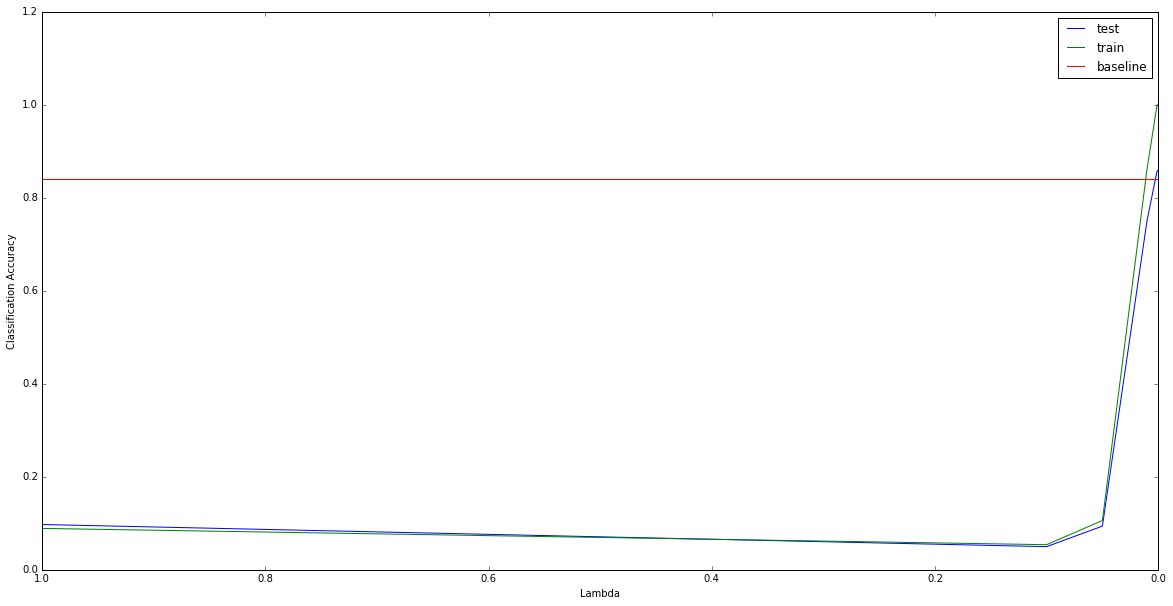

In [25]:
pd.DataFrame({"lam": lams, "test": test_accuracies, "train": training_accuracies,
             "baseline": [0.84] * len(lams)})\
                .plot(x="lam", y=["test","train", "baseline"], figsize=(20,10))
plt.xlabel("Lambda")
plt.ylabel("Classification Accuracy")